## Preparing Data For LSTM Model

In [60]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [61]:

data_train = pd.read_csv('./data/BTC_min_train.csv')

data_train = data_train.drop(columns=[data_train.columns[0], 'Time'])

data_train.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,250.0,13678.486,49.199846,13684.581860,-19.172,-1.115468
1,392.0,13604.025,55.076481,13607.979813,-74.461,-2.764855
2,462.0,13625.614,66.036799,13640.219678,21.589,-1.895589
3,431.0,13593.790,55.860854,13606.166401,-31.824,-2.532205
4,363.0,13626.110,73.936110,13622.362667,32.320,-1.335301


In [62]:
data_train.describe()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
count,1.577557e+06,1.577557e+06,1.577557e+06,1.577557e+06,1.577557e+06,1.577557e+06
mean,6.818868e+02,8.658795e+03,8.894935e+01,8.658741e+03,9.667185e-03,1.196388e-02
std,8.901478e+02,3.631015e+03,1.570471e+02,3.630954e+03,1.016069e+01,1.695193e+00
min,1.000000e+00,3.151545e+03,1.000000e-04,3.152326e+03,-6.118010e+02,-7.618506e+01
25%,2.620000e+02,6.509762e+03,2.810857e+01,6.509716e+03,-2.627486e+00,-1.071834e+00
50%,4.390000e+02,8.303030e+03,4.919763e+01,8.303118e+03,1.857143e-02,3.464660e-02
75%,7.760000e+02,1.013436e+04,9.148197e+01,1.013461e+04,2.675714e+00,1.113461e+00
max,3.829400e+04,2.929441e+04,1.040500e+04,2.927991e+04,3.298843e+02,9.620659e+01


In [63]:
data_test = pd.read_csv('./data/BTC_min_test.csv')

data_test = data_test.drop(columns=[data_test.columns[0], 'Time'])

data_test.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,2184.0,28786.383843,107.028965,28769.605995,7.855093,-1.560782
1,2396.0,28837.417500,118.647083,28815.223630,51.033657,-0.746264
2,1741.0,28827.286250,73.886917,28822.093352,-10.131250,-0.759900
3,1506.0,28844.981250,64.631821,28838.673203,17.695000,-0.409912
4,2029.0,28857.371250,96.636416,28860.861847,12.390000,-0.106990


In [64]:
window_size = 10

In [65]:
past_window = data_train.tail(window_size)

data_test = past_window.append(data_test, ignore_index=True)

In [66]:
scaler = MinMaxScaler(feature_range=(0,1))
data_train = scaler.fit_transform(data_train)
data_test = scaler.fit_transform(data_test)

In [67]:
X_train = []
Y_train = []

for i in range(window_size, data_train.shape[0]):
    X_train.append(data_train[i-window_size:i])
    Y_train.append(data_train[i, 0])


In [68]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [69]:
X_train.shape, Y_train.shape

((1577547, 10, 6), (1577547,))

In [70]:
print(X_train)
print(Y_train)

[[[0.00650249 0.40266971 0.00472847 0.40310868 0.62932808 0.43545955]
  [0.01021074 0.39982148 0.00529326 0.40017683 0.57061526 0.42589188]
  [0.01203875 0.40064728 0.00634663 0.40141077 0.67261324 0.43093427]
  ...
  [0.0070509  0.40006862 0.00278862 0.39987365 0.65414741 0.43561539]
  [0.00762541 0.39965229 0.0053524  0.39999483 0.63812932 0.43511579]
  [0.00744261 0.39981088 0.00589305 0.39981372 0.65409007 0.43648769]]

 [[0.01021074 0.39982148 0.00529326 0.40017683 0.57061526 0.42589188]
  [0.01203875 0.40064728 0.00634663 0.40141077 0.67261324 0.43093427]
  [0.01122921 0.39942997 0.00536865 0.40010743 0.61589259 0.42724142]
  ...
  [0.00762541 0.39965229 0.0053524  0.39999483 0.63812932 0.43511579]
  [0.00744261 0.39981088 0.00589305 0.39981372 0.65409007 0.43648769]
  [0.01120309 0.40095727 0.00703741 0.40042782 0.68151324 0.44125384]]

 [[0.01203875 0.40064728 0.00634663 0.40141077 0.67261324 0.43093427]
  [0.01122921 0.39942997 0.00536865 0.40010743 0.61589259 0.42724142]
  [0

## Training LSTM Model

In [71]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [72]:
regressor = Sequential()

#R1
regressor.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

#R2
regressor.add(LSTM(units=60, activation='relu', return_sequences=True))
regressor.add(Dropout(0.3))

#R3
regressor.add(LSTM(units=80, activation='relu', return_sequences=True))
regressor.add(Dropout(0.4))

#R4
regressor.add(LSTM(units=120, activation='relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [73]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 50)            11400     
                                                                 
 dropout_8 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 10, 60)            26640     
                                                                 
 dropout_9 (Dropout)         (None, 10, 60)            0         
                                                                 
 lstm_10 (LSTM)              (None, 10, 80)            45120     
                                                                 
 dropout_10 (Dropout)        (None, 10, 80)            0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [74]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [75]:
regressor.fit(X_train, Y_train, epochs=10, batch_size=15775)

Epoch 1/10
101/101 [==============================] - 273s 3s/step - loss: 4.3198e-04
Epoch 2/10
101/101 [==============================] - 264s 3s/step - loss: 3.1230e-04
Epoch 3/10
101/101 [==============================] - 262s 3s/step - loss: 2.8573e-04
Epoch 4/10
101/101 [==============================] - 270s 3s/step - loss: 2.6469e-04
Epoch 5/10
101/101 [==============================] - 269s 3s/step - loss: 2.4234e-04
Epoch 6/10
101/101 [==============================] - 279s 3s/step - loss: 2.2645e-04
Epoch 7/10
101/101 [==============================] - 243s 2s/step - loss: 2.2505e-04
Epoch 8/10
101/101 [==============================] - 260s 3s/step - loss: 2.1587e-04
Epoch 9/10
101/101 [==============================] - 237s 2s/step - loss: 2.2117e-04
Epoch 10/10
101/101 [==============================] - 260s 3s/step - loss: 2.1293e-04


## Preparing Test Set For LSTM Prediction

In [76]:
X_test = []
Y_test = []

for i in range(window_size, data_test.shape[0]):
    X_test.append(data_test[i-window_size:i])
    Y_test.append(data_test[i, 0])

In [77]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [78]:
X_test.shape, Y_test.shape

((349897, 10, 6), (349897,))

## Predicting Outputs For Test Set

In [79]:
Y_pred = regressor.predict(X_test)

In [80]:
Y_test

array([0.02495513, 0.02737863, 0.01989094, ..., 0.01497536, 0.02131989,
       0.01217463])

In [81]:
Y_pred

array([[0.01646134],
       [0.01697405],
       [0.01808205],
       ...,
       [0.01973021],
       [0.01939727],
       [0.02143792]], dtype=float32)

## Descaling Outputs

In [82]:
scale_factor = 1/scaler.scale_[4]


In [83]:
scale_factor

3987.056250000001

In [84]:
Y_pred = Y_pred * scale_factor
Y_test = Y_test * scale_factor

In [85]:
Y_pred.shape, Y_test.shape

((349897, 1), (349897,))

In [86]:
Y_test

array([ 99.49751127, 109.16011887,  79.30630766, ...,  59.70762243,
        85.00359987,  48.54092969])

In [87]:
Y_pred

array([[65.63227 ],
       [67.676506],
       [72.09414 ],
       ...,
       [78.66545 ],
       [77.338005],
       [85.47419 ]], dtype=float32)

In [88]:
og_data_test = pd.read_csv('./data/BTC_min_test.csv')

og_data_test = og_data_test.drop(columns=[og_data_test.columns[0], 'Time'])

close_price = og_data_test['Close'] 



In [89]:
pred_list = []
price_list = []

count = 0
for each in close_price:

    prediction = each + Y_pred [count]
    price = each + Y_test [count]
    
    pred_list.append(prediction)
    price_list.append(price)
    
    count = count + 1
    

In [90]:
pred_list

[array([28852.018], dtype=float32),
 array([28905.094], dtype=float32),
 array([28899.38], dtype=float32),
 array([28914.684], dtype=float32),
 array([28924.732], dtype=float32),
 array([28856.516], dtype=float32),
 array([28893.082], dtype=float32),
 array([28905.172], dtype=float32),
 array([28926.754], dtype=float32),
 array([28937.352], dtype=float32),
 array([28959.621], dtype=float32),
 array([28933.664], dtype=float32),
 array([28933.006], dtype=float32),
 array([28928.9], dtype=float32),
 array([28922.7], dtype=float32),
 array([28959.668], dtype=float32),
 array([28958.48], dtype=float32),
 array([28963.686], dtype=float32),
 array([28981.48], dtype=float32),
 array([28967.738], dtype=float32),
 array([29019.123], dtype=float32),
 array([29031.445], dtype=float32),
 array([29022.637], dtype=float32),
 array([29003.234], dtype=float32),
 array([28995.326], dtype=float32),
 array([29017.371], dtype=float32),
 array([28998.5], dtype=float32),
 array([29008.69], dtype=float32),
 a

In [91]:
price_list

[28885.881353951892,
 28946.577618874104,
 28906.592557658016,
 28913.576648290407,
 28949.804118925545,
 28896.354912462706,
 28903.101664764676,
 28875.240499845673,
 28941.737776972805,
 28920.434809873663,
 28968.054012697627,
 28966.20336114432,
 28920.020214384924,
 28915.723202141708,
 28928.30306517713,
 28987.68020715523,
 28987.45338934806,
 28947.122461563256,
 28990.445545414794,
 28971.38301137728,
 29082.245895392505,
 29056.603108002673,
 29002.005460320997,
 29000.967749794236,
 28981.045959541065,
 29010.812304814,
 29042.22191317432,
 29029.90919660311,
 29020.759893514867,
 29027.65010129806,
 29048.728473070063,
 29037.03609591256,
 29115.78040214856,
 29048.514797446758,
 29031.307007469597,
 29040.933535915156,
 29023.872012800508,
 29071.899430362926,
 29100.460029664948,
 29044.09930090195,
 29045.22100839843,
 29035.069755993005,
 29191.68659077804,
 29110.185512749067,
 29086.368153286003,
 29101.472144835214,
 29078.845467737236,
 29095.178596420854,
 29081.0

## Visualization & Evaluation

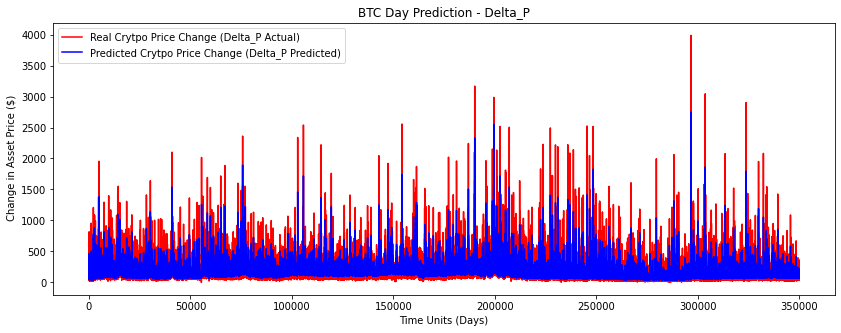

In [92]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Crytpo Price Change (Delta_P Actual)')
plt.plot(Y_pred, color = 'blue', label = 'Predicted Crytpo Price Change (Delta_P Predicted)')
plt.title('BTC Day Prediction - Delta_P')
plt.xlabel('Time Units (Days)')
plt.ylabel(' Change in Asset Price ($)')
plt.legend()
plt.show()

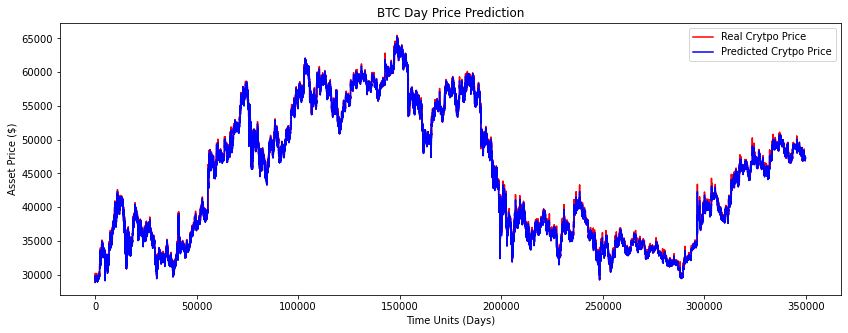

In [93]:
plt.figure(figsize=(14,5))
plt.plot(price_list, color = 'red', label = 'Real Crytpo Price')
plt.plot(pred_list, color = 'blue', label = 'Predicted Crytpo Price')
plt.title('BTC Day Price Prediction')
plt.xlabel('Time Units (Days)')
plt.ylabel('Asset Price ($)')
plt.legend()
plt.show()

In [94]:
diff_sq_sum = 0
for i in range(0, len(price_list)):
    diff = price_list[i] - pred_list[i]
    diff_sq = diff * diff
    diff_sq_sum = diff_sq_sum + diff_sq
    
RMSE = math.sqrt(diff_sq_sum/len(price_list))
    
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 72.27037206980758


In [95]:
diff_sum = 0
for i in range(0, len(price_list)):
    diff = abs((price_list[i] - pred_list[i]) / price_list [i])
    diff_sum = diff_sum + diff
    
MAPE = diff_sum[0]/len(price_list)
    
print("Mean Absolue Percentage Error (MAPE):", MAPE)

Mean Absolue Percentage Error (MAPE): 0.0009636398214822862


In [96]:
dir_match_count = 0
price_diff = 0
pred_diff = 0
for i in range(1, len(price_list)):
    
    price_diff = price_list [i] - price_list[i - 1]
    pred_diff = pred_list[i] - pred_list[i - 1]
    
    if np.sign(price_diff) == np.sign(pred_diff):
        dir_match_count = dir_match_count + 1

correct_dir_perc = dir_match_count/(len(price_list) - 1)
        
print("Correct Direction Prediction Accuracy:", correct_dir_perc)

Correct Direction Prediction Accuracy: 0.7456158401353545
